# Medical Cost Personal Insurance Project

# Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age ,bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

# Columns                                            
•	age: age of primary beneficiary

•	sex: insurance contractor gender, female, male

•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

•	children: Number of children covered by health insurance / Number of dependents

•	smoker: Smoking

•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•	charges: Individual medical costs billed by health insurance


Predict : Can you accurately predict insurance costs?

Raw_Data- https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Medical_Cost.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Here 7 columns are present including 1 output ("charges") columns,

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df.shape

(1338, 7)

In [9]:
print('The dimension of the dataset: ', df.shape)
print(f"\nThe column headers in the dataset:{df.columns}")

The dimension of the dataset:  (1338, 7)

The column headers in the dataset:Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [10]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

There are three types of data present 

In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no any null values 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

This gives the brief about the dataset which includes indexing type, column type, o null values and memory usage.

<Axes: >

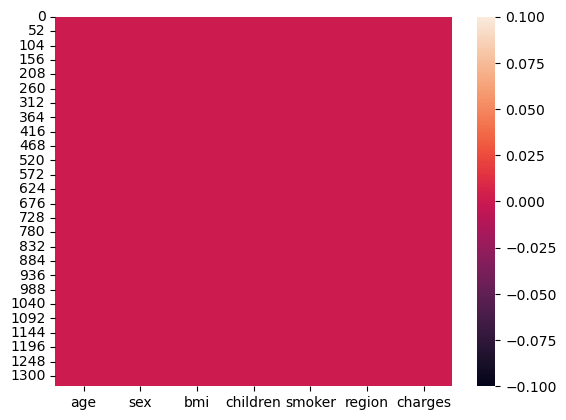

In [14]:
# Lets visualize it using heatmap
sns.heatmap(df.isnull())

here We can clearly visualize that there is no missing data present.

In [15]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [16]:
# Checking number of unique values in each column
df.nunique().to_frame("No. of unique values")

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [17]:
# Checking the value counts of each column 
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64


sex
male      676
female    662
Name: count, dtype: int64


bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


smoker
no     1064
yes     274
Name: count, dtype: int64


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


charges
1639.56310     2
16884.92400    1
29

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
# Checking Duplicate values in Dataframe
print('Total Duplicate Rows are ', df.duplicated().sum())

Total Duplicate Rows are  1


In [21]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [24]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [25]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [29]:
type(df)

pandas.core.frame.DataFrame

In [30]:
df=pd.DataFrame(data=df)

In [32]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Converting Categorical Features to Numerical

In [33]:
df['region'].value_counts().sort_values()

region
northeast    324
southwest    325
northwest    325
southeast    364
Name: count, dtype: int64

In [34]:
df['children'].value_counts().sort_values()

children
5     18
4     25
3    157
2    240
1    324
0    574
Name: count, dtype: int64

In [35]:
type(df)

pandas.core.frame.DataFrame

In [54]:
from sklearn.preprocessing import LabelEncoder

In [56]:
lencode=LabelEncoder()
df['sex']=lencode.fit_transform(df['sex'])
df
# this is change of Sex columns data string to numerical.

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [58]:
lencode=LabelEncoder()
df['region']=lencode.fit_transform(df['region'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,3,16884.92400
1,18,1,33.770,1,no,2,1725.55230
2,28,1,33.000,3,no,2,4449.46200
3,33,1,22.705,0,no,1,21984.47061
4,32,1,28.880,0,no,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,1,10600.54830
1334,18,0,31.920,0,no,0,2205.98080
1335,18,0,36.850,0,no,2,1629.83350
1336,21,0,25.800,0,no,3,2007.94500


In [59]:
lencode=LabelEncoder()
df['smoker']=lencode.fit_transform(df['smoker'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [71]:
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [61]:
type(df)

pandas.core.frame.DataFrame

In [62]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [64]:
df.isnull().count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [72]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

there are no any null values in any columns 

<Axes: >

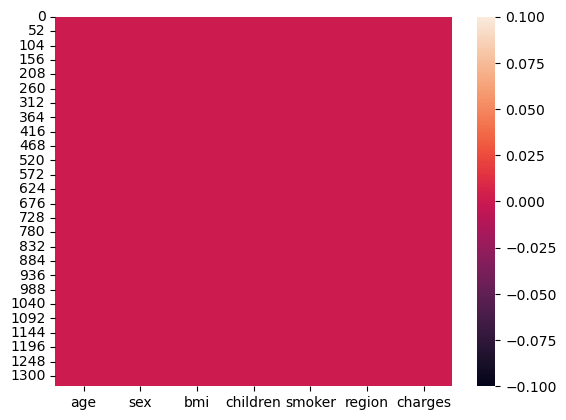

In [73]:
sns.heatmap(df.isnull())

In [74]:
df.iloc[488,:]

age            44.00000
sex             0.00000
bmi            38.06000
children        0.00000
smoker          1.00000
region          2.00000
charges     48885.13561
Name: 488, dtype: float64

In [75]:
df.nunique().to_frame('No. of unique values')

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [76]:
df["charges"].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [77]:
df["bmi"].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [78]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [79]:
df["region"].unique()

array([3, 2, 1, 0])

In [80]:
df['charges'].value_counts()

charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

In [81]:
# Staticial Summary of Dataset
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


# Observation 

This gives the statistical information of the numerical columns. The summary of the dataset looks perfect since there is no negative/incvalid values

From the above description we can observe the following:
1) The Counts of all the columns are same which means there are no missing values in the dataset.
2) the median(50) value is greater then mean in age, bmi and charges columns which means the data is skewed to left these column.
3) By summarizing the data we can observe there is a huge difference between 75% and max hence there are outliers present in the data.
4) We can also notice the Standard deviation, min, 25% percentile valuese from this describe method.

# Data Visualization
Univariate Analysis

charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64


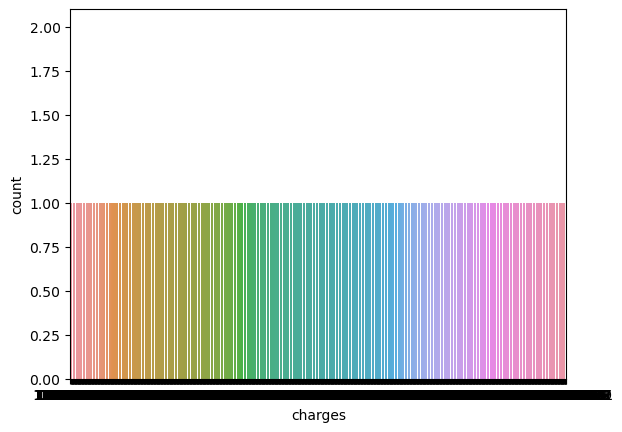

In [89]:

ax=sns.countplot(x='charges',data=df)
print(df['charges'].value_counts())

bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64


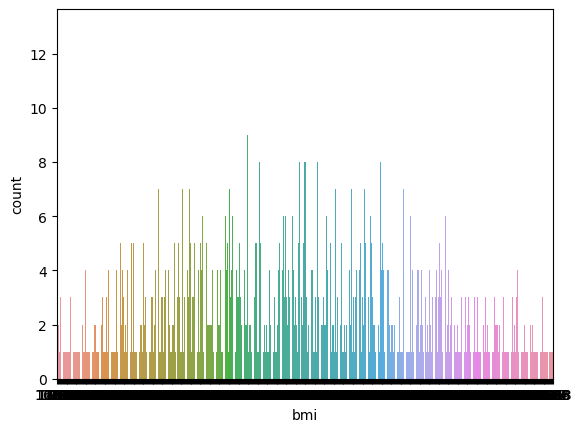

In [90]:
ax=sns.countplot(x='bmi',data=df)
print(df['bmi'].value_counts())

sex
1    676
0    662
Name: count, dtype: int64


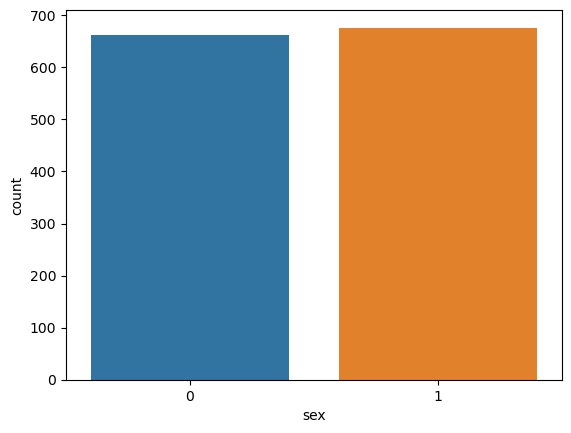

In [91]:
ax=sns.countplot(x='sex',data=df)
print(df['sex'].value_counts())

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64


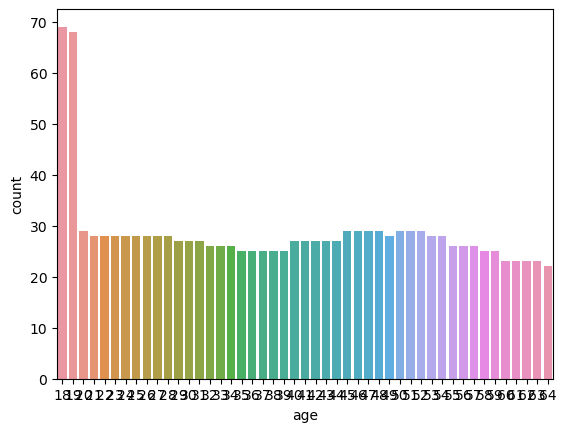

In [93]:
ax=sns.countplot(x='age',data=df)
print(df['age'].value_counts())

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


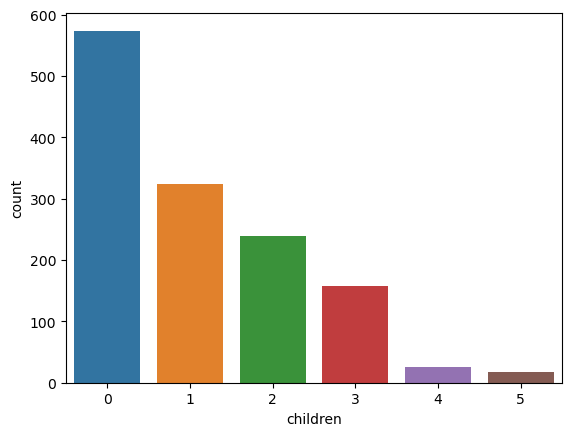

In [95]:
ax=sns.countplot(x='children',data=df)
print(df['children'].value_counts())

region
2    364
3    325
1    325
0    324
Name: count, dtype: int64


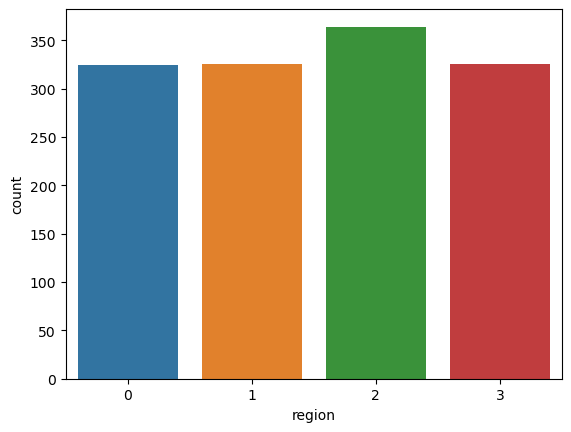

In [97]:
ax=sns.countplot(x='region',data=df)
print(df['region'].value_counts())

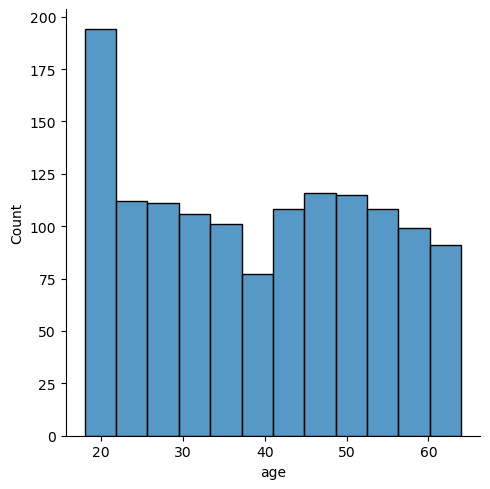

In [98]:
sns.displot(df['age'])

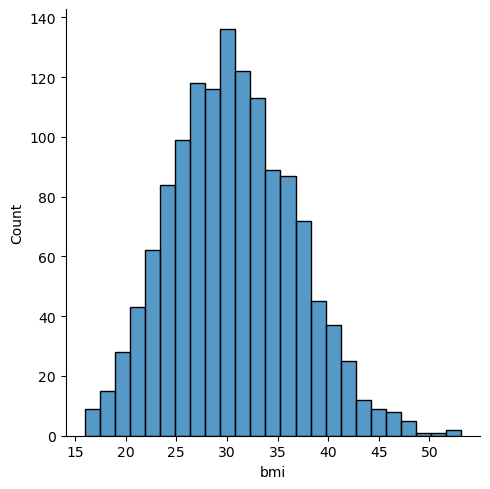

In [99]:
sns.displot(df['bmi'])

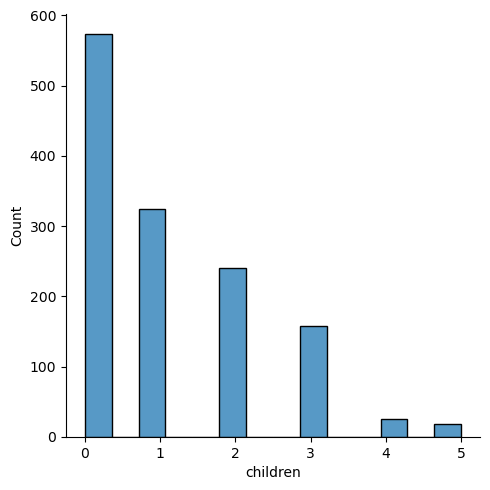

In [100]:
sns.displot(df['children'])

In [102]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [114]:
numerical_col=df['age'],df['bmi'],df['charges']

In [113]:
numrical_col

(0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64,
 0       27.900
 1       33.770
 2       33.000
 3       22.705
 4       28.880
          ...  
 1333    30.970
 1334    31.920
 1335    36.850
 1336    25.800
 1337    29.070
 Name: bmi, Length: 1338, dtype: float64,
 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Length: 1338, dtype: float64)

# Bivariate Analysis

<Axes: title={'center': 'Comparison between tenure and SeniorCitizen'}, xlabel='bmi', ylabel='charges'>

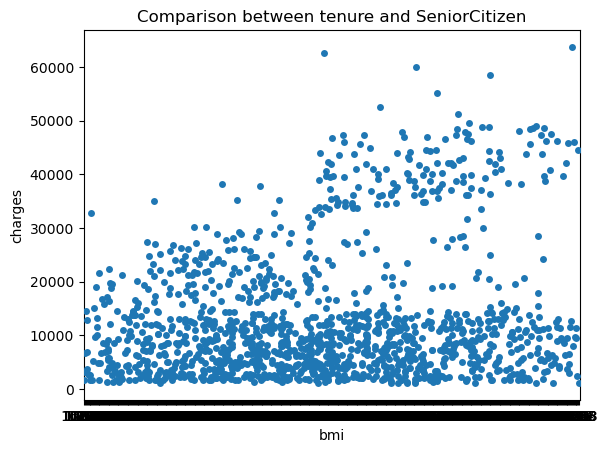

In [121]:
# comparing tenure and SeniorCitizen
plt.title('Comparison between bmi and charges')
sns.stripplot(x='bmi',y='charges',data=df)

<Axes: title={'center': 'Comparison between age and charges'}, xlabel='age', ylabel='charges'>

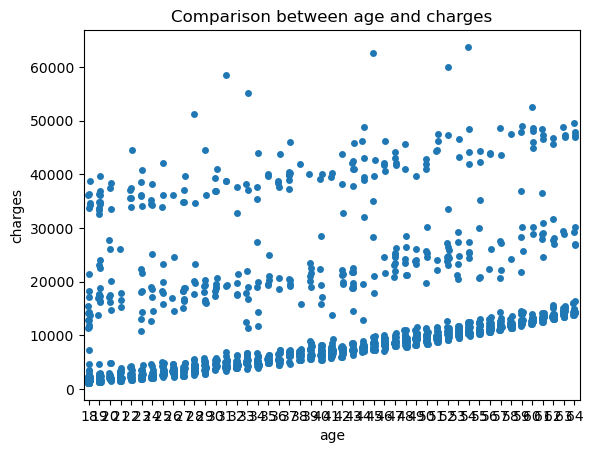

In [122]:
plt.title('Comparison between age and charges')
sns.stripplot(x='age',y='charges',data=df)

<Axes: title={'center': 'Comparison between smoker and charges'}, xlabel='smoker', ylabel='charges'>

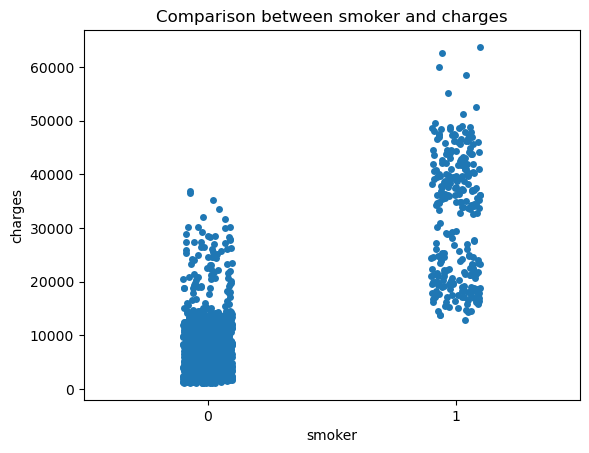

In [124]:
plt.title('Comparison between smoker and charges')
sns.stripplot(x='smoker',y='charges',data=df)

<Axes: title={'center': 'Comparison between sex and charges'}, xlabel='sex', ylabel='charges'>

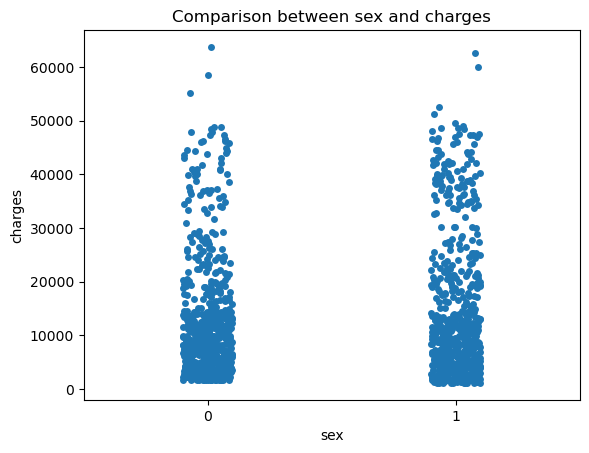

In [125]:
plt.title('Comparison between sex and charges')
sns.stripplot(x='sex',y='charges',data=df)

<Axes: title={'center': 'Comparison between region and charges'}, xlabel='region', ylabel='charges'>

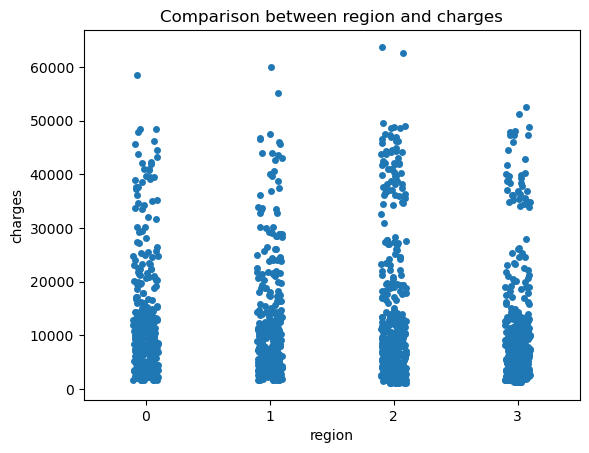

In [127]:
plt.title('Comparison between region and charges')
sns.stripplot(x='region',y='charges',data=df)

In [126]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


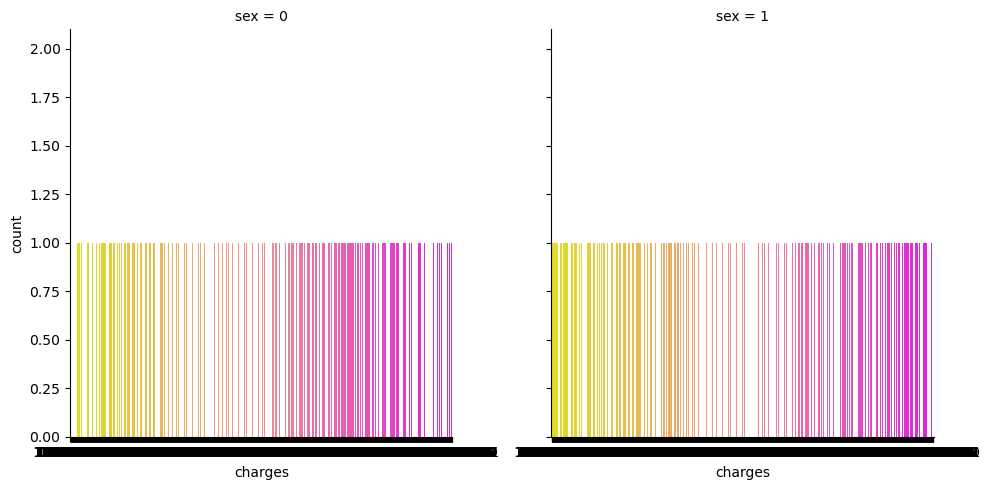

In [129]:
# Checking Churn level and gender
sns.catplot(x='charges',col='sex',data=df,kind='count',palette='spring_r')

## Checking churn level and partner
#sns.catplot(x='charges',col='bmi',data=df,palette='tab20b_r',kind='count')
#
## Checking Churn level in Dependents
#sns.catplot(x='charges',col='region',data=df, palette='Dark2',kind='count')
#plt.show()

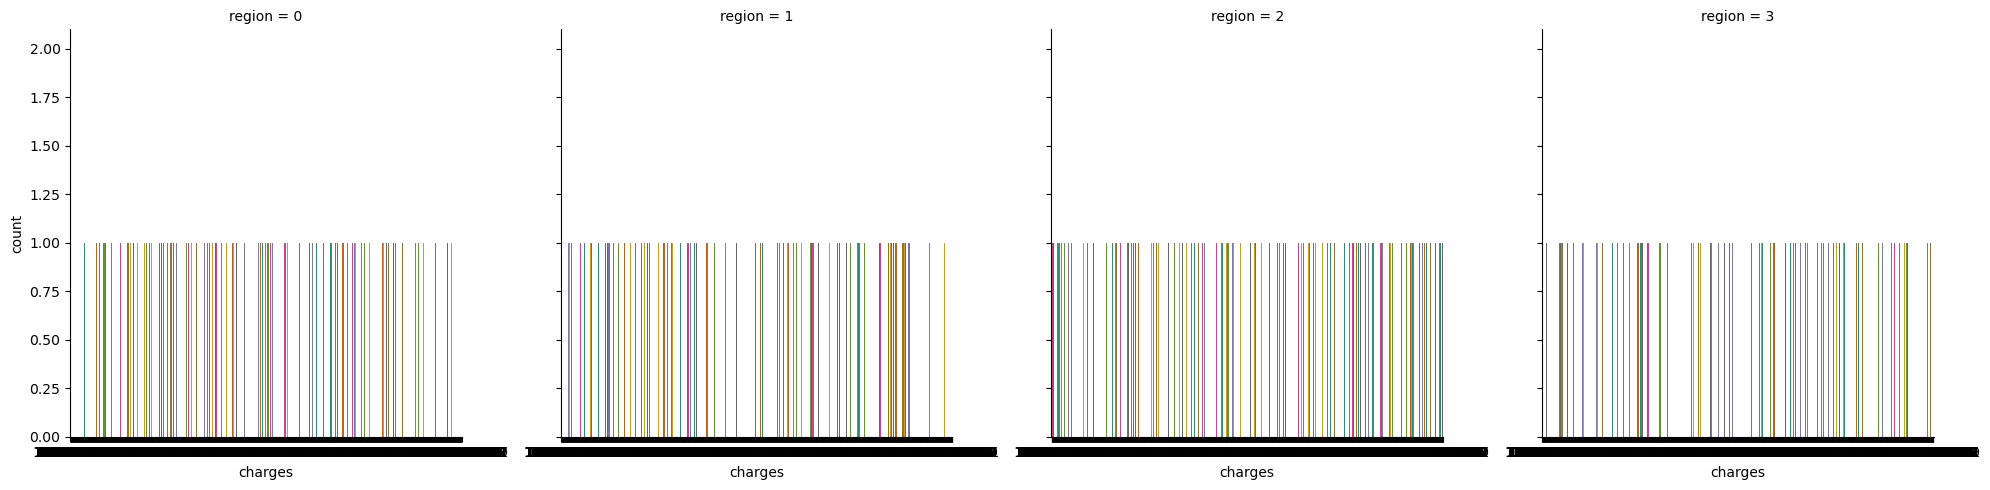

In [131]:
sns.catplot(x='charges',col='region',data=df, palette='Dark2',kind='count')
plt.show()

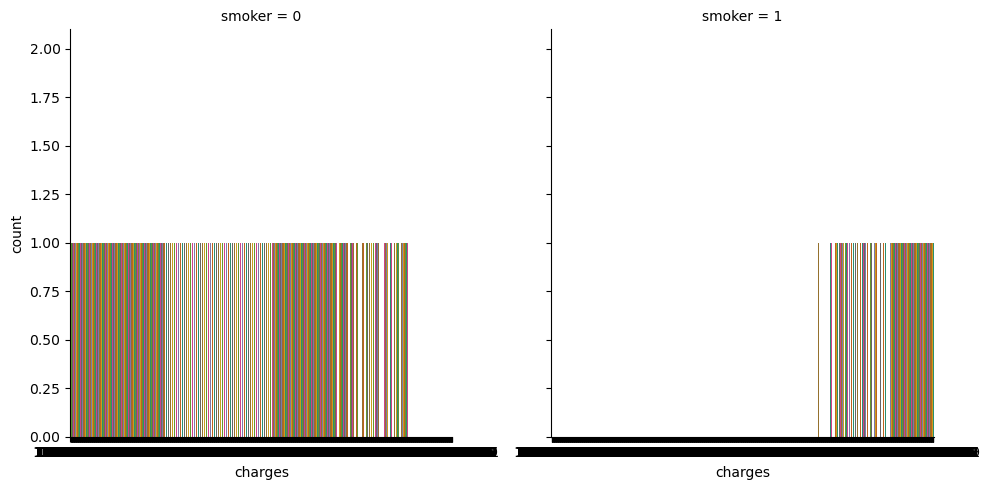

In [132]:
sns.catplot(x='charges',col='smoker',data=df, palette='Dark2',kind='count')
#plt.show()

# Check Outliers 

<Axes: >

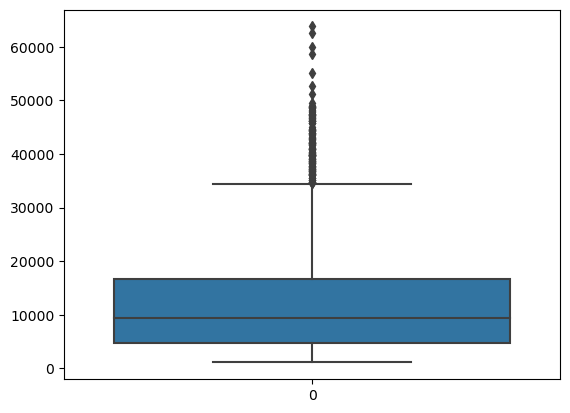

In [138]:
sns.boxplot(df['charges'])

in charges column outliers are present, but this is target varible then no need to remove outliers 

<Axes: >

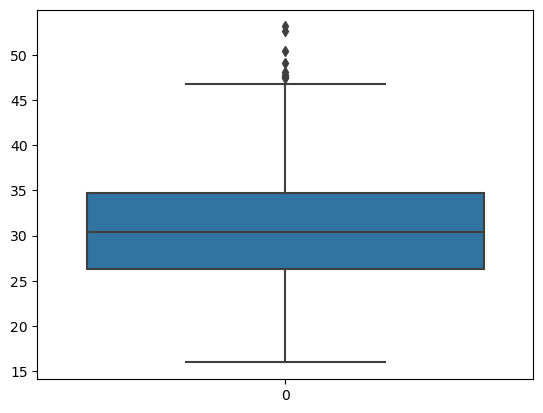

In [139]:
sns.boxplot(df['bmi'])

in bim column outliers are present 

<Axes: >

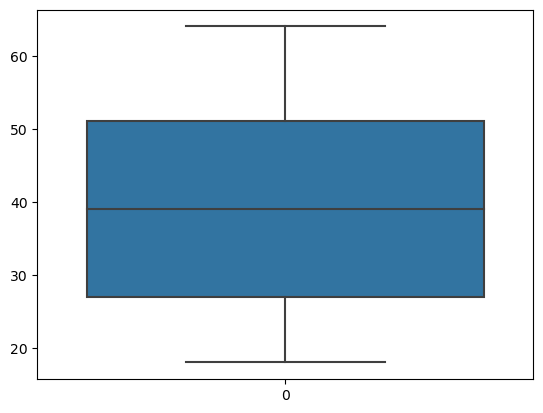

In [140]:
sns.boxplot(df['age'])

In [ ]:
in age column no any outliers are present 

<Axes: >

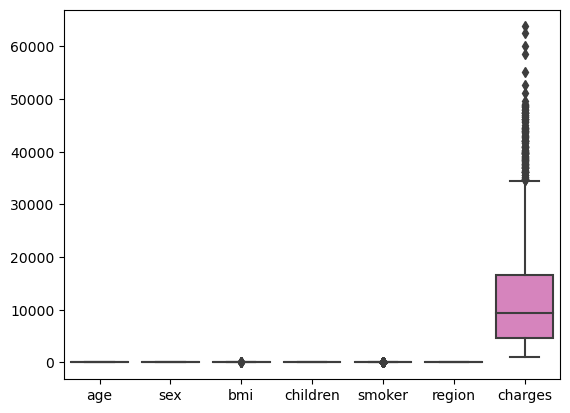

In [142]:
sns.boxplot(df)

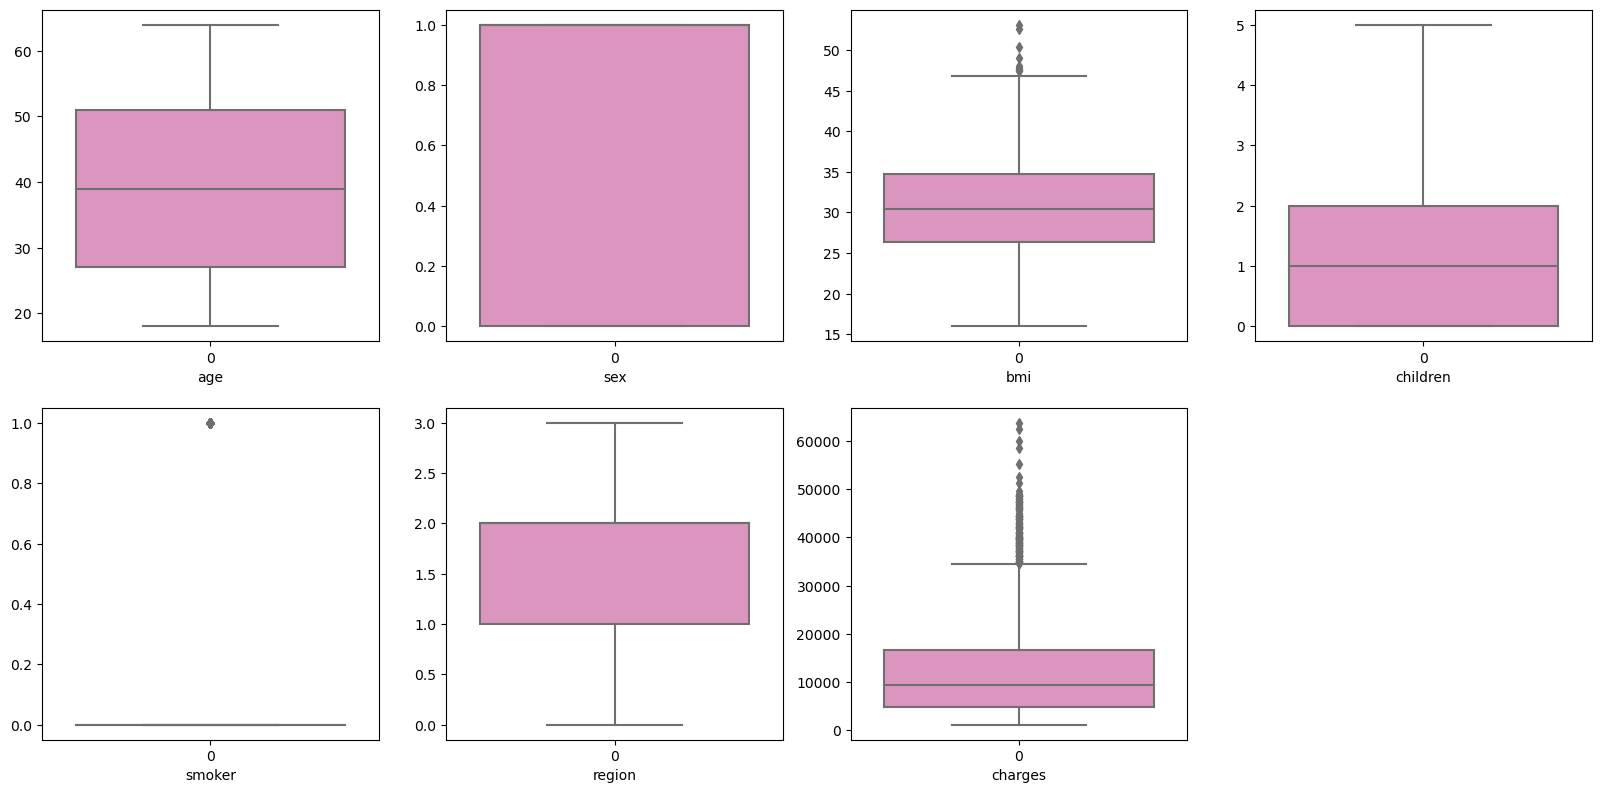

In [144]:
## Lets check the outliers by plotting boxplot.
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette='Set2_r')
        plt.xlabel(i)
        
    p+=1
plt.show()

# Let's Checking How the Data has been distriubted in each column

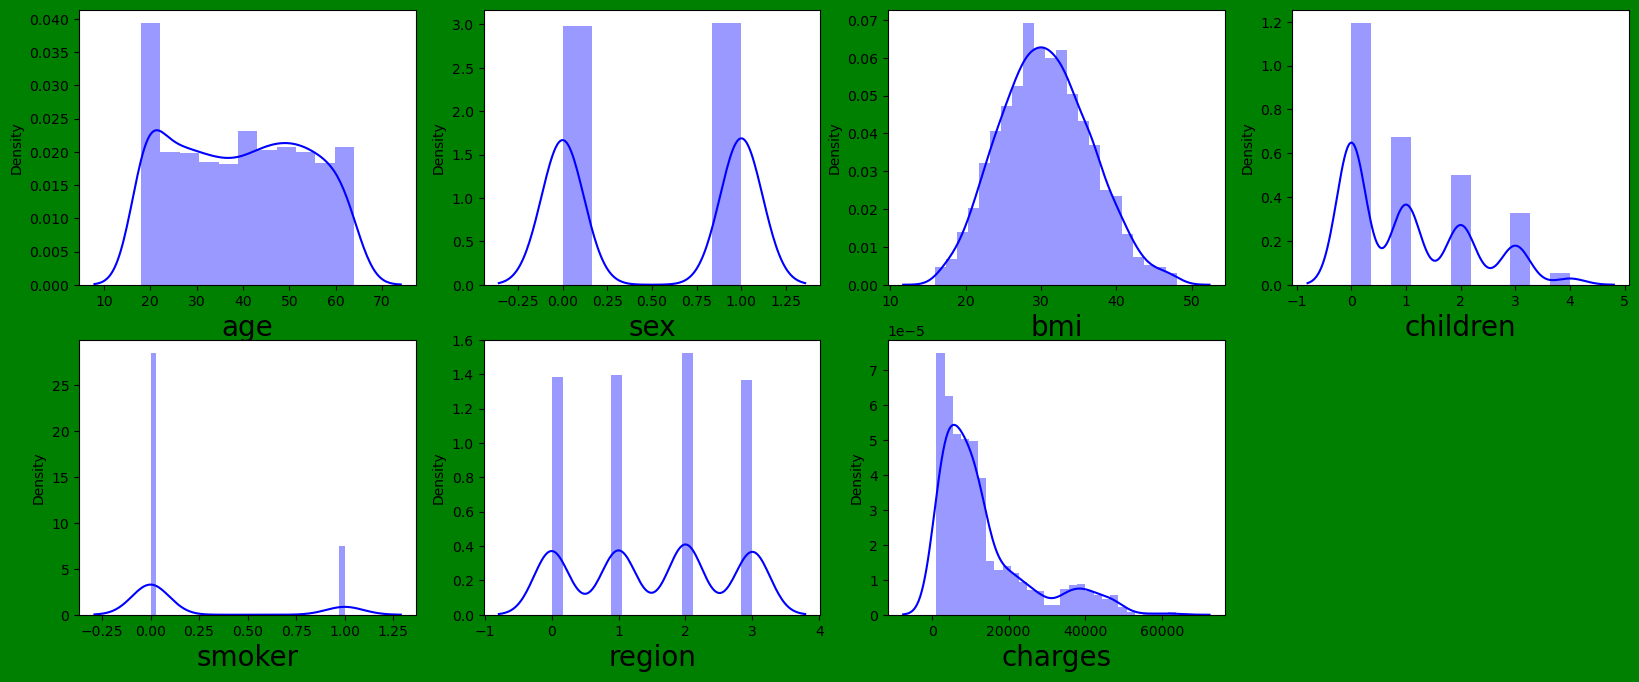

In [201]:
plt.figure(figsize=(20,25),facecolor='green')
plotnumber=1

for column in df:
    if plotnumber<=18:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Checking for Skewness

In [202]:
df.skew()

age         0.049904
sex        -0.012172
bmi         0.193564
children    0.740881
smoker      1.450367
region     -0.024107
charges     1.501055
dtype: float64

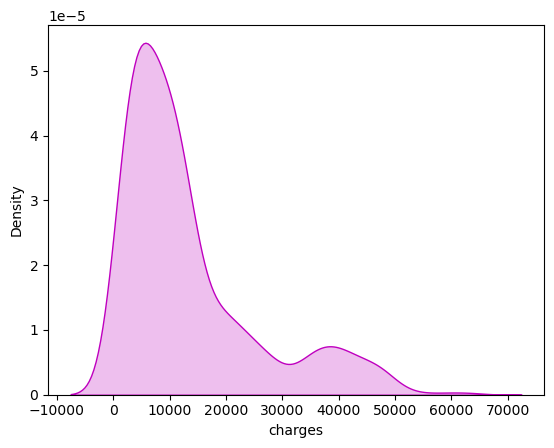

In [204]:
sns.distplot(df['charges'],color='m',kde_kws={'shade':True},hist=False)
plt.show()

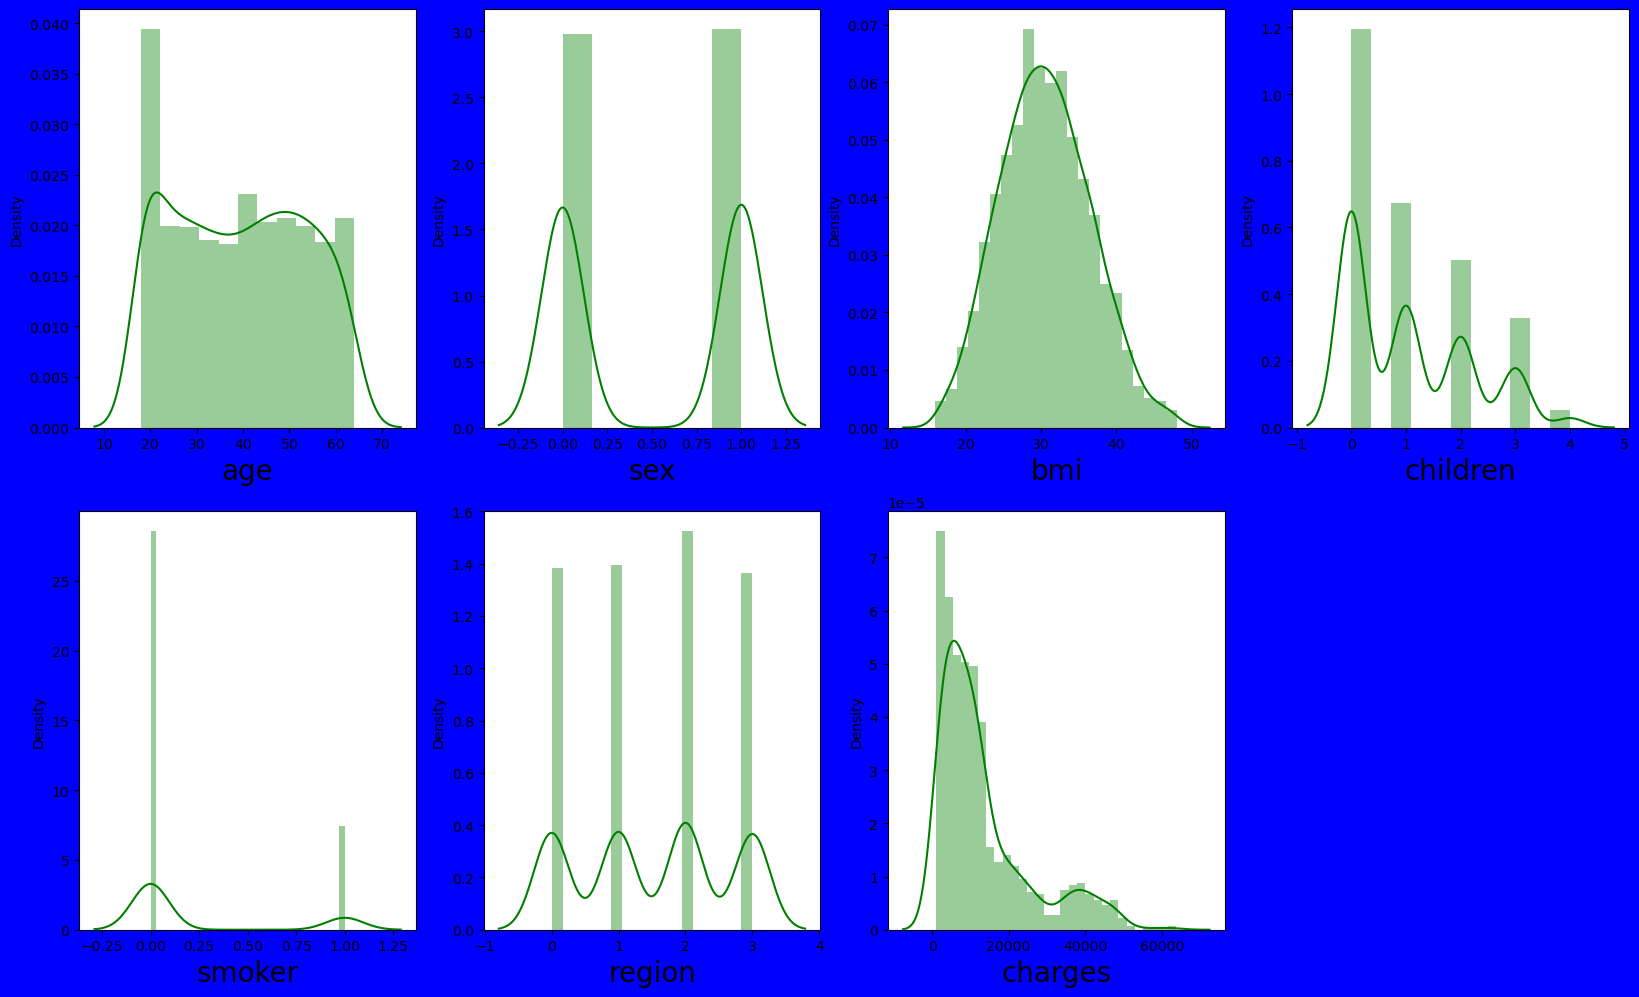

In [205]:
# let us visulize again 
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber=1

for column in df:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column],color='green')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Check Correlation between target variable and independent variables

In [206]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.017673,0.119062,0.058319,-0.025751,0.004741,0.299554
sex,-0.017673,1.000000,0.039934,0.015315,0.079468,0.006155,0.059243
bmi,0.119062,0.039934,1.000000,0.027706,0.004988,0.159535,0.203195
children,0.058319,0.015315,0.027706,1.000000,0.025409,-0.004830,0.090870
smoker,-0.025751,0.079468,0.004988,0.025409,1.000000,-0.001462,0.786772
region,0.004741,0.006155,0.159535,-0.004830,-0.001462,1.000000,-0.004410
charges,0.299554,0.059243,0.203195,0.090870,0.786772,-0.004410,1.000000


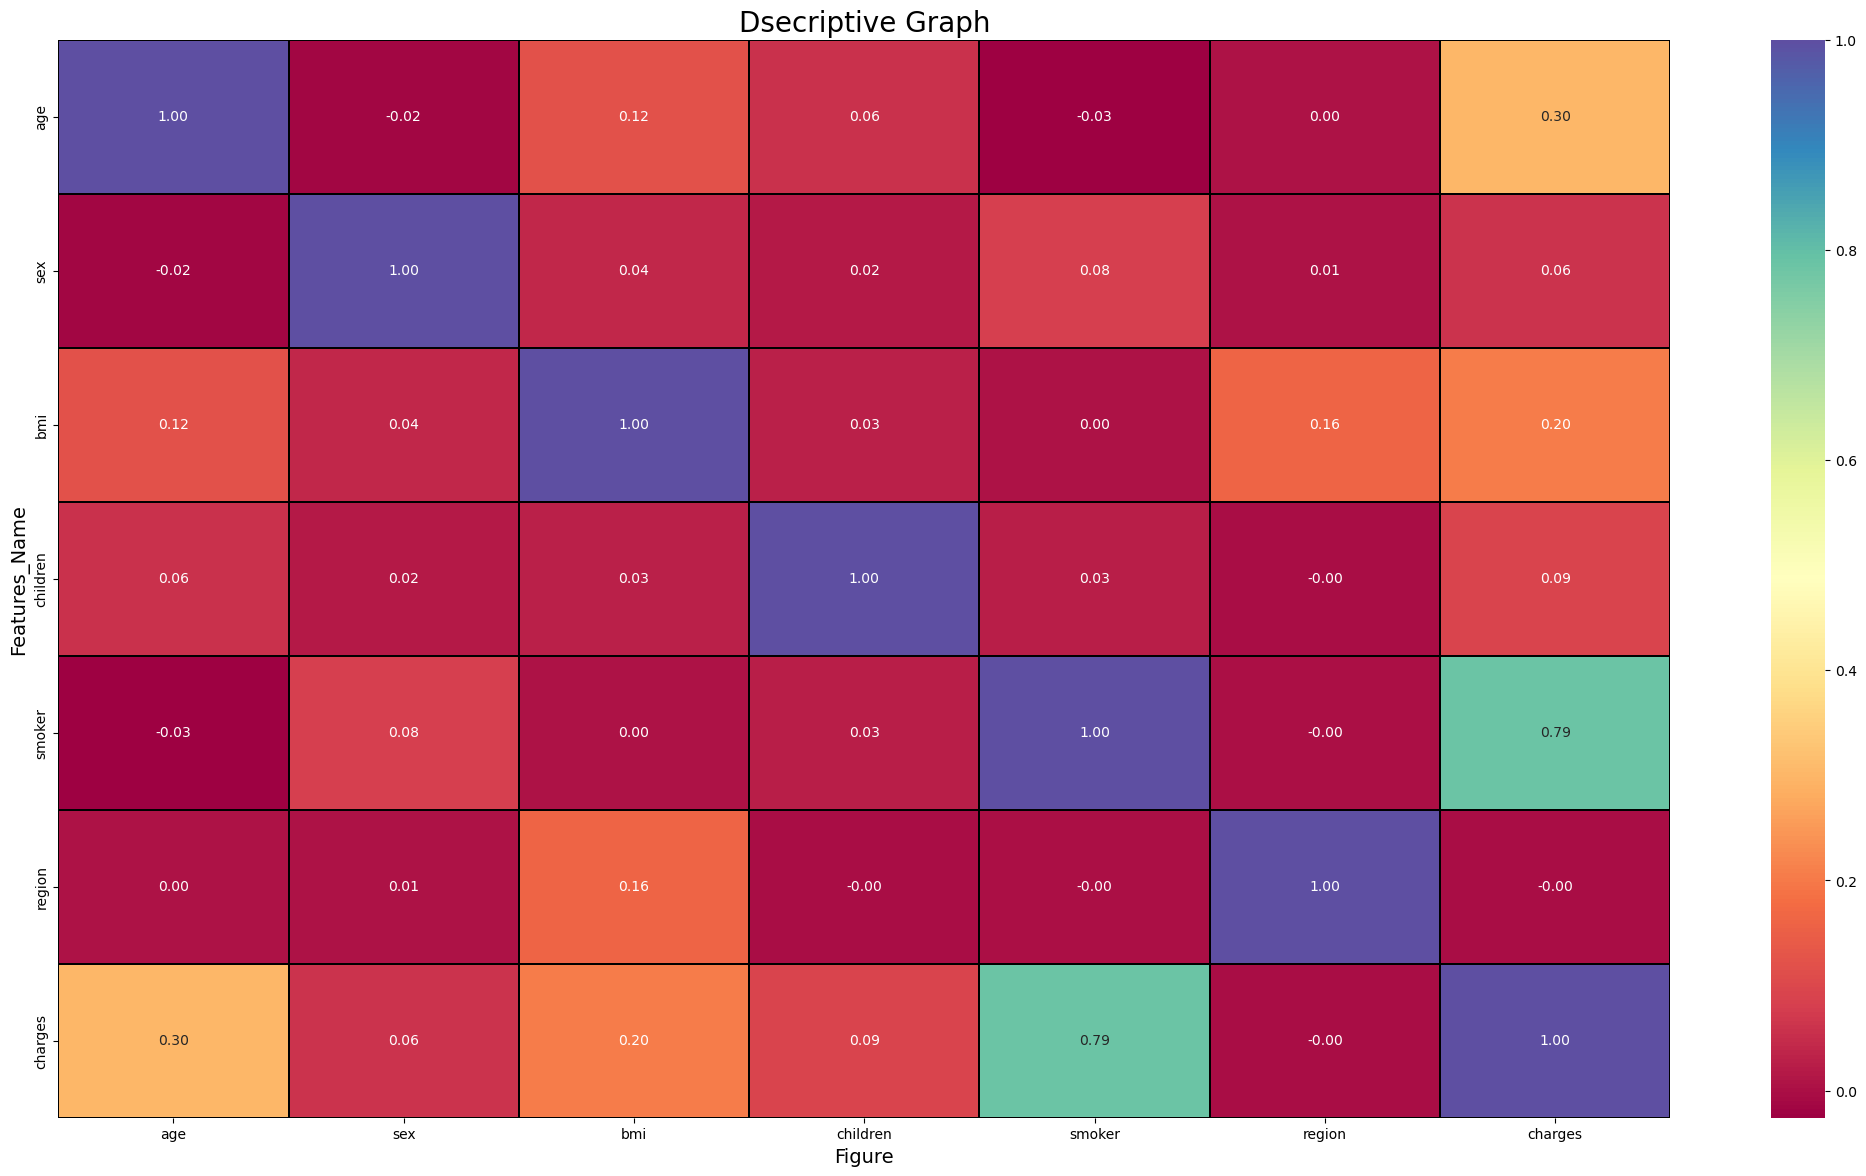

In [207]:
plt.figure(figsize=(26,14))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Dsecriptive Graph',fontsize=20)
plt.show()

In [209]:
df.corr().quality.sort_values()

AttributeError: 'DataFrame' object has no attribute 'quality'

# Visualizing the correlation between label and fratures using bar plot

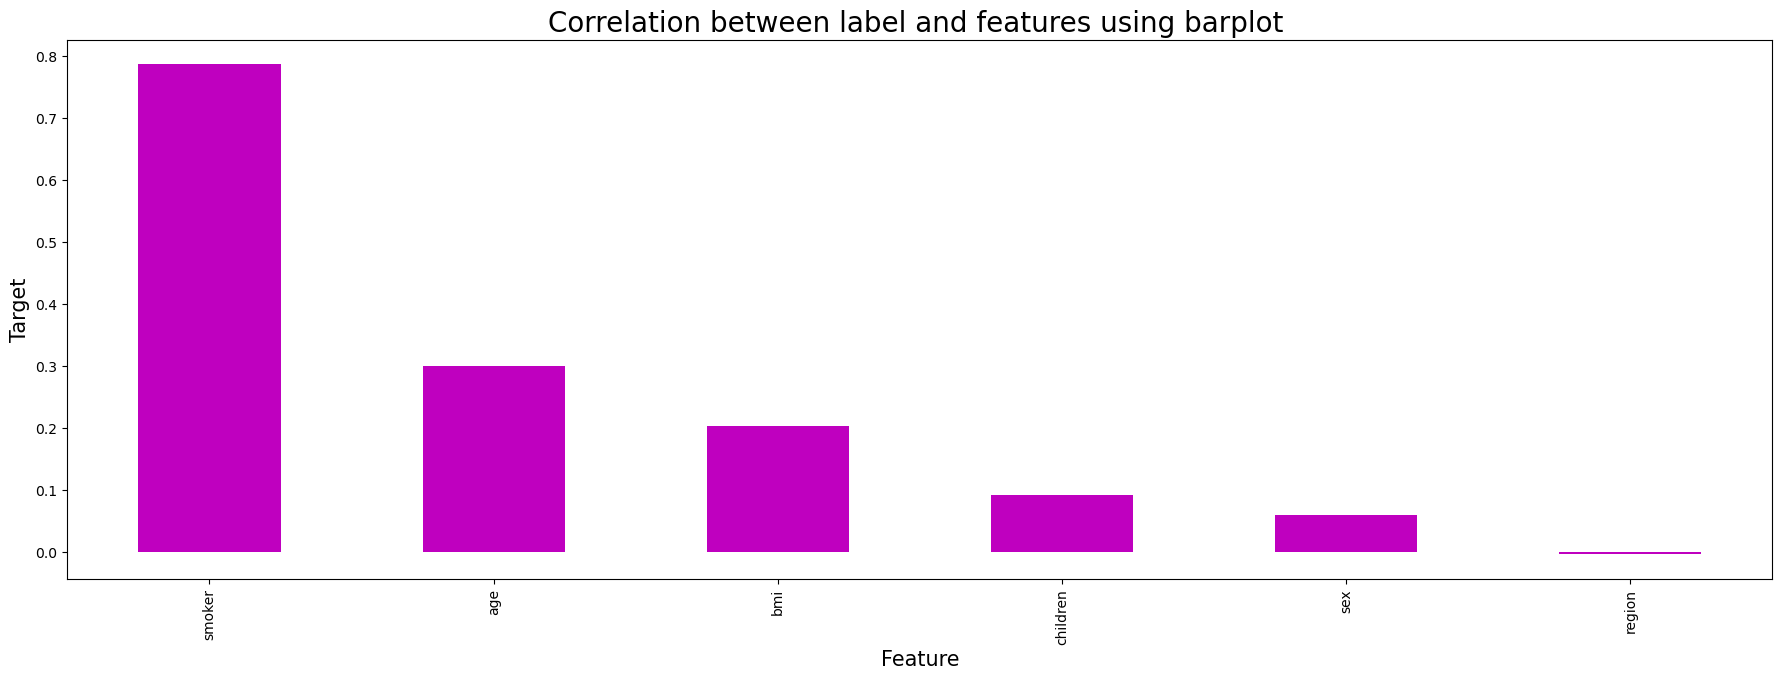

In [212]:
plt.figure(figsize=(22,7))
df.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("Correlation between label and features using barplot ", fontsize=20)
plt.show()

In [213]:
# Separating Features and label

In [214]:
# Separating the independent and target variables into x and y

x=df.iloc[:,:-1]
y=df.iloc[:,-1]

print('Feature Dimension =', x.shape)
print('Label Dismension ',y.shape)

Feature Dimension = (1316, 6)
Label Dismension  (1316,)


In [215]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.441444,-1.006098,-0.453768,-0.928234,1.959141,1.352089
1,-1.512509,0.993939,0.527239,-0.038536,-0.510428,0.446568
2,-0.801858,0.993939,0.398555,1.740862,-0.510428,0.446568
3,-0.446533,0.993939,-1.321967,-0.928234,-0.510428,-0.458954
4,-0.517598,0.993939,-0.289988,-0.928234,-0.510428,-0.458954
...,...,...,...,...,...,...
1311,0.761574,0.993939,0.059297,1.740862,-0.510428,-0.458954
1312,-1.512509,-1.006098,0.218063,-0.928234,-0.510428,-1.364475
1313,-1.512509,-1.006098,1.041975,-0.928234,-0.510428,0.446568
1314,-1.299314,-1.006098,-0.804724,-0.928234,-0.510428,1.352089


# Checking Variance inflation Factor(VIF)

In [216]:
# Finding Variance inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features']=x.columns

vif

,VIF values,Features
0,1.018969,age
1,1.008550,sex
2,1.043397,bmi
3,1.004829,children
4,1.007649,smoker
5,1.026415,region


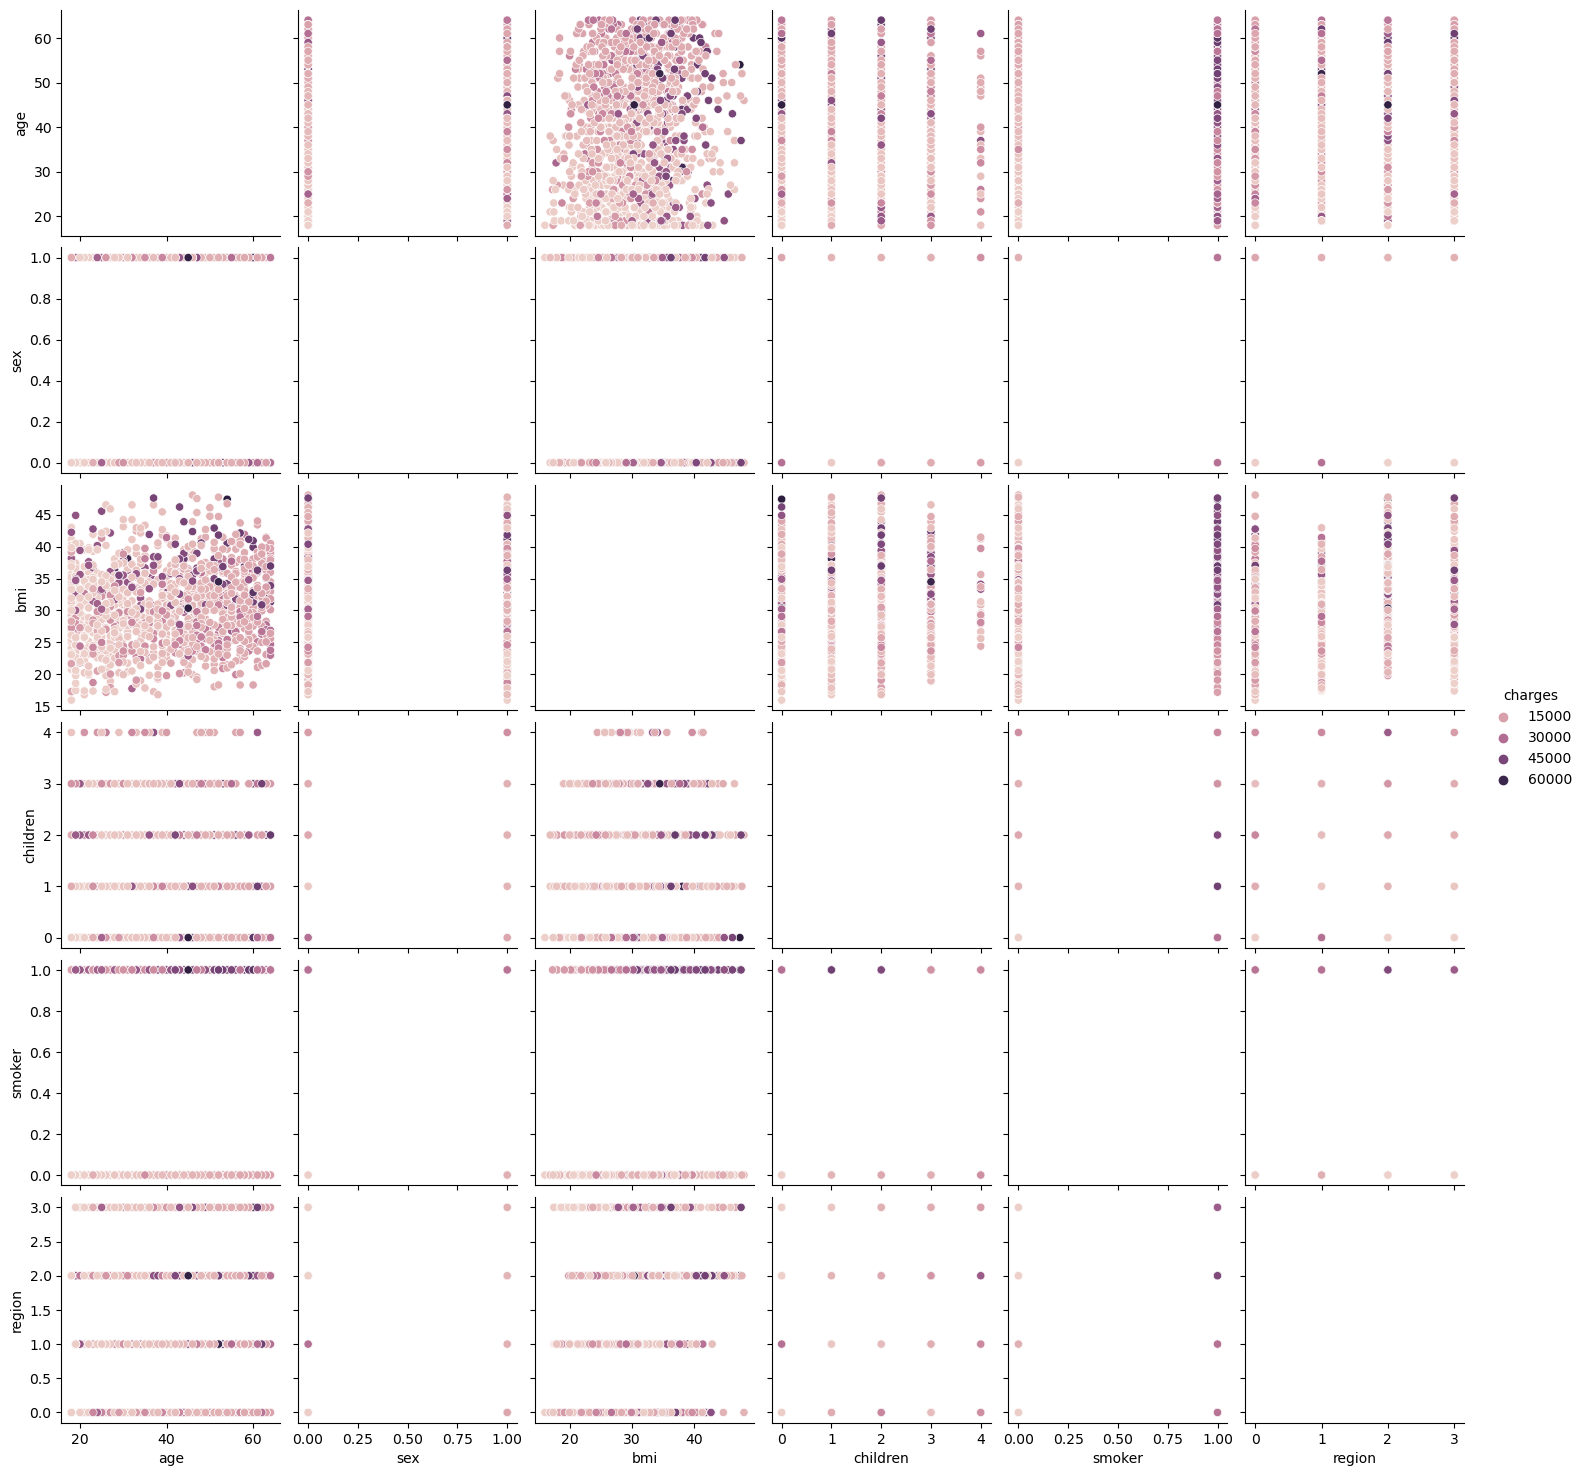

In [218]:
sns.pairplot(df,hue='charges')

# Modelling

In [219]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [220]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [221]:
# Testing 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [222]:
y_train.shape

(921,)

In [223]:
y_test.shape

(395,)

In [224]:
x_train.shape

(921, 6)

In [225]:
x_test.shape

(395, 6)

In [226]:
# NOW CALL THE MultinomialNB()
mnb=MultinomialNB()

In [227]:
mnb

MultinomialNB()

In [228]:
# importing necessary libraies:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [231]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import cross_val_score

In [232]:
# finding the best Random State

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Maximum r2 score is ', maxAccu, 'On Randm_state',maxRS)
    

Maximum r2 score is  0.8095951183237355 On Randm_state 38


In [233]:
score1=cross_val_score(lr,x,y)
print(score1)
print(score1.mean())
print('Difference between R2 scored and cross validation score is ', (r2_score(y_test,pred) - score1.mean())*100)


[0.76083173 0.70903994 0.77840442 0.72604513 0.76143299]
0.7471508430420551
Difference between R2 scored and cross validation score is  -2.5462280895841904


In [234]:
# Random Foreset Regressor()
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)

print('R2_score: ', r2_score(y_test,pred_RFR))
print('R2_score on training Date: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error: ', mean_squared_error(y_test, pred_RFR))
print('Rooot Mean Swuared Error: ', np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score:  0.8221137474091926
R2_score on training Date:  97.91742686874093
Mean Absolute Error:  2690.2752379217723
Mean Squared Error:  24865645.446204115
Rooot Mean Swuared Error:  4986.546444805675


In [236]:
score2=cross_val_score(RFR,x,y)
print(score2)
print(score2.mean())
print('Difference between R2 score and cross validation score is - ', (r2_score(y_test,pred_RFR)-score2.mean())*100)


[0.85291156 0.77375395 0.86111245 0.82355504 0.8581155 ]
0.8338897006581039
Difference between R2 score and cross validation score is -  -1.177595324891123


In [237]:
# K-Nearest Neighbors (KNN)
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score: ',r2_score(y_test,pred_knn))
print('R2_score on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score:  0.7856598893016217
R2_score on training Data:  88.2319272527734
Mean Absolute Error:  3153.7270638627847
Mean Squared Error:  29961310.218760762
Root Mean Squared Error:  5473.692557932055


In [238]:
score3=cross_val_score(knn,x,y)
print(score3)
print(score3.mean())
print('Difference between R2 scored and cross validation score is ', (r2_score(y_test,pred_knn) - score3.mean())*100)

[0.82139209 0.75698491 0.83949648 0.8033858  0.81280207]
0.806812269270978
Difference between R2 scored and cross validation score is  -2.115237996935637


In [239]:
# Extra Tree Regressor()
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_ETR=etr.predict(x_test)
pred_train=etr.predict(x_train)

print('R2_score : ', r2_score(y_test,pred_ETR))
print('r2_scorn on training DATA : ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,pred_ETR))
print('Mean Squared Error : ', mean_squared_error(y_test,pred_ETR))
print('Rooot Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_ETR) ))

R2_score :  0.7969655946702192
r2_scorn on training DATA :  100.0
Mean Absolute Error :  2786.08546065767
Mean Squared Error :  28380953.911736507
Rooot Mean Squared Error:  5327.377770698874


In [241]:
score4=cross_val_score(etr,x,y)
print(score4)
print(score4.mean())
print('Difference between R2 score and cross validation score is - ', (r2_score(y_test,pred_ETR)-score4.mean())*100)


[0.83642696 0.74513466 0.84943343 0.80856257 0.84639908]
0.8171913384239821
Difference between R2 score and cross validation score is -  -2.022574375376285


In [242]:
# SVM
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_SVR=svr.predict(x_test)
pred_train=svr.predict(x_train)

print('R2_score: ', r2_score(y_test,pred_SVR))
print('R2_score on training DATA : ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,pred_SVR))
print('Mean Squared Error : ', mean_squared_error(y_test,pred_SVR))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,pred_SVR)))


R2_score:  -0.08194014893888069
R2_score on training DATA :  -9.066480344364525
Mean Absolute Error :  8194.116637833498
Mean Squared Error :  151237882.33041763
Root Mean Squared Error :  12297.881213055265


In [244]:
score5=cross_val_score(svr,x,y)
print(score5)
print(score5.mean())
print('Difference between R2 score and cross validation score is - ', (r2_score(y_test,pred_SVR)-score5.mean())*100)


[-0.11311862 -0.10554672 -0.07029545 -0.1005942  -0.1075108 ]
-0.09941315707947389
Difference between R2 score and cross validation score is -  1.7473008140593203


In [245]:
# LASSO 
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score : ', r2_score(y_test,pred_lasso))
print('R2_score on training Date : ', r2_score(y_train,pred_train)*100)
print('Mean  Absolute Error : ', mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error : ', mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score :  0.7217054415666597
R2_score on training Date :  76.22156846580715
Mean  Absolute Error :  4160.434075537826
Mean Squared Error :  38901116.40908767
Root Mean Squared Error :  6237.075950242042


In [246]:
score6=cross_val_score(lasso,x,y)
print(score6)
print(score6.mean())
print('Difference between R2 score and cross validation score is - ', (r2_score(y_test,pred_lasso)-score6.mean())*100)


[0.76083951 0.70907086 0.77838556 0.72604469 0.76143662]
0.7471554471025387
Difference between R2 score and cross validation score is -  -2.545000553587895


In [247]:
from sklearn.model_selection import GridSearchCV
param={'alpha':[1.0,.05,.4,2],'fit_intercept':[True,False],
      'solver':['auto','svd','cholesky','lsqr','sag','saga','lbfgs'],
      'positive':[False,True],
      'random_state':[1,4,10,20]
      }
gscv=GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [248]:
gscv.best_params_

{'alpha': 1.0,
 'fit_intercept': True,
 'positive': False,
 'random_state': 1,
 'solver': 'auto'}

In [249]:
Model=Ridge(alpha=0.05,fit_intercept=True,positive=False,random_state=1,solver='lsqr')

In [250]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)

print('R2_score : ', r2_score(y_test,pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test,pred))
print('Mean Squared Error : ', mean_squared_error(y_test,pred))
print('Rooot Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred) ))

R2_score :  0.7216880199789234
Mean Absolute Error :  4160.601411118004
Mean Squared Error :  38903551.6676726
Rooot Mean Squared Error:  6237.271171567948


# Saved The Model

In [251]:
import pickle
filename='Red Wine Quality Prediction Project'
pickle.dump(Model,open(filename,'wb')) #saved model

In [252]:
import pickle 
loaded_model= pickle.load(open('Red Wine Quality Prediction Project','rb')) # 'rb'= read_binary
result=loaded_model.score(x_test,y_test)
print(result*100)

72.16880199789234


In [253]:
conculusion=pd.DataFrame([loaded_model.predict(x_test),y_test[:]],index=['Predicted','Original'])
conculusion

,0,1,2,3,4,5,6,7,8,9,...,385,386,387,388,389,390,391,392,393,394
Predicted,3829.40770,8350.24673,11308.861467,36956.907741,9293.255725,11225.022837,8035.171983,36197.089191,16250.344133,6726.578928,...,11030.298729,14459.763232,4014.655656,14170.429734,26849.601641,6784.989641,10371.489681,5372.951923,5875.426522,17429.38469
Original,24059.68019,6238.29800,25992.821040,29141.360300,6338.075600,12323.936000,6185.320800,41919.097000,30063.580550,5272.175800,...,9288.026700,10325.206000,2254.796700,11363.283200,18223.451200,4058.712450,7749.156400,3171.614900,4562.842100,14418.28040
